In [ ]:
!pip install git+https://github.com/williamedwardhahn/mpcr
!git clone https://github.com/idash2020/ProceduralGenerationCSVs
!git clone https://github.com/idash2020/Tiles
from mpcr import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-u6tfcysf
  Running command git clone --filter=blob:none --quiet https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-u6tfcysf
  Resolved https://github.com/williamedwardhahn/mpcr to commit 8d265643f3b8b6e0ed96c7fb98da047fdcd3bb51
  Preparing metadata (setup.py) ... done
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-py3-none-any.whl size=7682 sha256=caf1d3b78b2fdbcf39d33a3f0ea975e6001a67a2ca651a044f3f2a7cf08ed7d5
  Stored in directory: /tmp/pip-ephem-wheel-cache-dfcx302w/wheels/8e/ce/5f/35330a2ccb2f50a7b7061e8a8b87f1ebe8d617d383beddc76f
Successfully built ImportMPCR
Cloning into 'ProceduralGenerationCSVs'...
remote: Enumerating objects: 370, done.
remote: Counting objects: 100% (370/370), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 370 (delta 323), reused 370 (delta 323), 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#Convolutional Transpose

In [ ]:
import os
import time
import torch
import torchvision 
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import pylab
from tqdm.notebook import trange,tqdm
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.utils

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
def makeImage(ids):
  #adapted from https://holypython.com/python-pil-tutorial/creating-photo-collages/
  ids = ids.T
  width = 21*ids.shape[1]
  hight = 21*ids.shape[0]
  img = Image.new("RGBA",(width,hight))
  for j in range(ids.shape[0]):
    for i in range(ids.shape[1]):
      if(ids[i,j]==-1):
          numStr = "929"
      else:
          numStr =format(ids[i,j],"03")
      img.paste(Image.open("/content/Tiles/tile"+numStr+".png"),(21*i,j*21))
  return img

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
batch_size = 32

In [ ]:
# num_of_files = len(os.listdir("/content/ProceduralGenerationCSVs/"))
# num_of_files = 100000
# level_list = [
#     np.genfromtxt(("/content/ProceduralGenerationCSVs/Level_"+str(level_num)+".csv"),delimiter=',',dtype=int)
#     for level_num in range(1,num_of_files)
# ]
# p = 1
# print(p)
# plt.imshow(level_list[p])
# #makeImage(level_list[p]) 

  0%|          | 0/100000 [00:00<?, ?it/s]

1


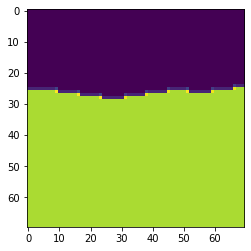

In [ ]:
num_of_files = len(os.listdir("/content/ProceduralGenerationCSVs/"))
level_list = []
pure_grass = []
pure_stone = []
grey_snow  = []
dirt_snow = []


for level_num in trange(1,num_of_files):

    # percent = int((level_num/num_of_files)*100)
    # print("Progress: " + str(percent)+"%  | " + "   [ " + percent*"█" + (100-percent)*"░" + "]" )
    
    level = np.genfromtxt(("/content/ProceduralGenerationCSVs/Level_"+str(level_num)+".csv"),delimiter=',',dtype=int)
    level_list.append(level)
    if(157 in level):
      pure_grass.append(level)
    if(343 in level):
      pure_stone.append(level)
    if(95 in level):
      grey_snow.append(level)
    if(33 in level):
      dirt_snow.append(level)

#     print('\b'*200)
# print("Progress: " + str(100)+"%  | " + "   [ " + 100*"█"  + "]" )
p = 1
print(p)
plt.imshow(level_list[p])
#makeImage(level_list[p]) 

In [ ]:
print(len(pure_grass),len(pure_stone),len(grey_snow),len(dirt_snow))

25103 25157 24875 24865


In [ ]:
level_list

In [ ]:
#level_stack = np.stack(level_list)
level_stack = np.stack(pure_grass)
#level_stack = np.stack(pure_stone)
# level_stack = np.stack(grey_snow)
# level_stack = np.stack(dirt_snow)



level_stack = level_stack[:,None,:,:]
level_stack+=1

In [ ]:
level_stack.shape

(100000, 1, 70, 70)

In [ ]:
X = level_stack

In [ ]:
X

array([[[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [158, 158, 158, ..., 158, 158, 158],
         [158, 158, 158, ..., 158, 158, 158],
         [158, 158, 158, ..., 158, 158, 158]]],


       [[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [ 34,  34,  34, ...,  34,  34,  34],
         [ 34,  34,  34, ...,  34,  34,  34],
         [ 34,  34,  34, ...,  34,  34,  34]]],


       [[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         ...,
         [ 34,  34,  34, ...,  34,  34,  34],
         [ 34,  34,  34, ...,  34,  34,  34],
         [ 34,  34,  34, ...,  34,  34,  34]]],


       ...,


       [[[  0,   0,   0, ...,   0,   0,   0],
         [  0,   0,   0, ...,   0,   0,   0],
         [  

In [ ]:
###################################################

In [ ]:
X_mean = np.mean(X)
X_std = np.std(X)

X = X - X_mean
X = X / X_std

In [ ]:
X = GPU_data(X)

In [ ]:
X

tensor([[[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086],
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086],
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847],
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847],
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.684

In [ ]:
def UndoPreProcessing(X):
  X = X * X_std
  X = X + X_mean
  X = X - 1
  return X

In [ ]:
X 

tensor([[[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086],
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086],
          [ 0.7086,  0.7086,  0.7086,  ...,  0.7086,  0.7086,  0.7086]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847],
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847],
          [-0.3847, -0.3847, -0.3847,  ..., -0.3847, -0.3847, -0.3847]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.684

In [ ]:
def get_batch():
    b = batch_size
    r = np.random.randint(X.shape[0]-b) 
    x = X[r:r+b,:,:,:]
    return x

In [ ]:
x = get_batch()

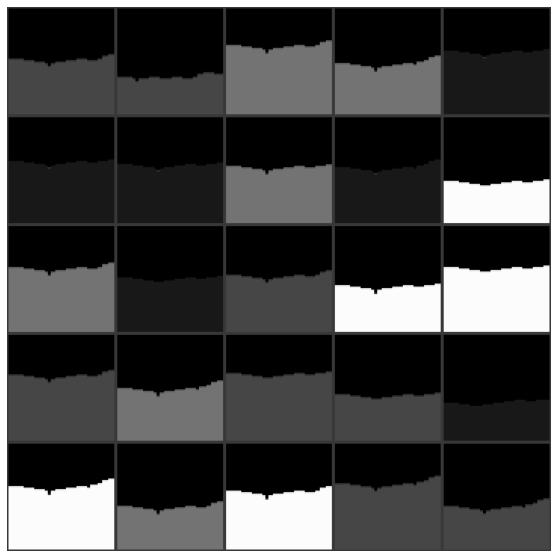

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
x

tensor([[[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619],
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619],
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          ...,
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619],
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619],
          [ 0.1619,  0.1619,  0.1619,  ...,  0.1619,  0.1619,  0.1619]]],


        [[[-0.6845, -0.6845, -0.6845,  ..., -0.6845, -0.6845, -0.6845],
          [-0.6845, -0.684

In [ ]:
def backprop(model):
    if model == 'd':
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
    elif model ==  'g':
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,36992)))
#G
w3 = GPU(randn_trunc((36992,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 36992)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 17, 17)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0001)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0001)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

  0%|          | 0/1562500 [00:00<?, ?it/s]

0 6.255849838256836 1.6930906772613525


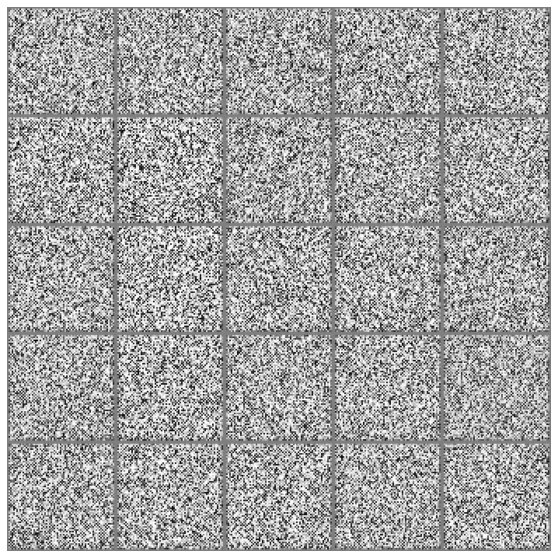

2000 0.054226502776145935 3.050781488418579


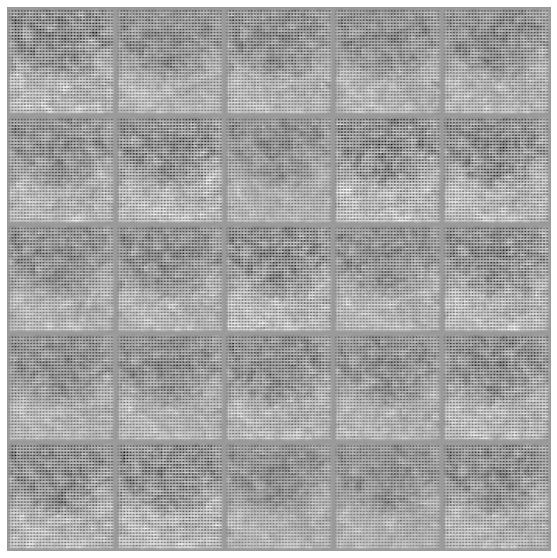

4000 0.008216197602450848 5.200821399688721


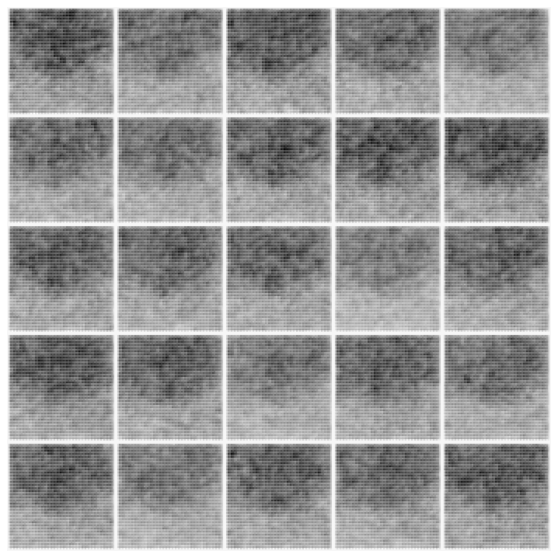

6000 0.48345792293548584 0.9622877836227417


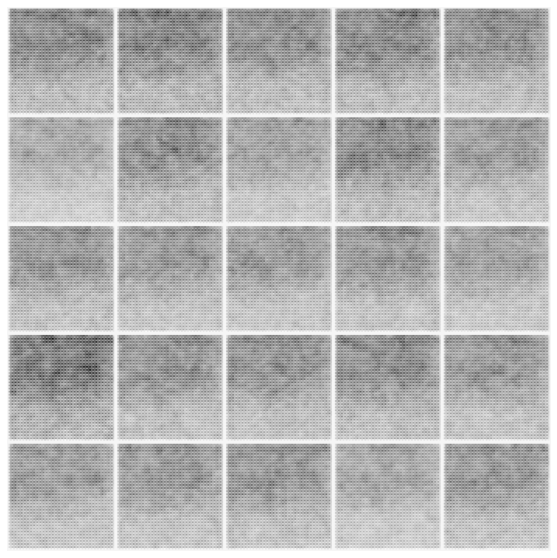

8000 0.6915629506111145 0.6947230100631714


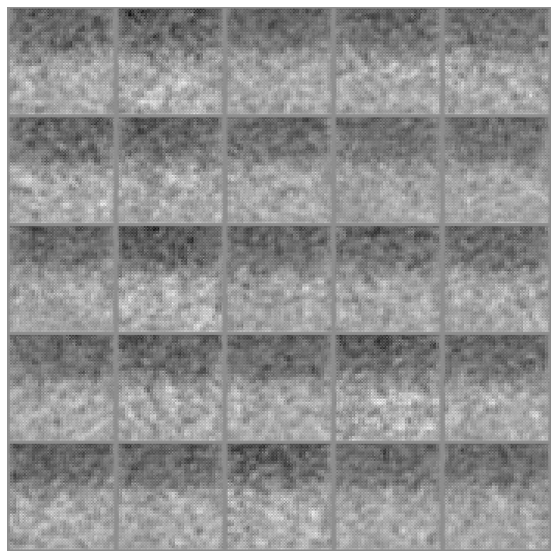

10000 0.6931471824645996 0.6931471824645996


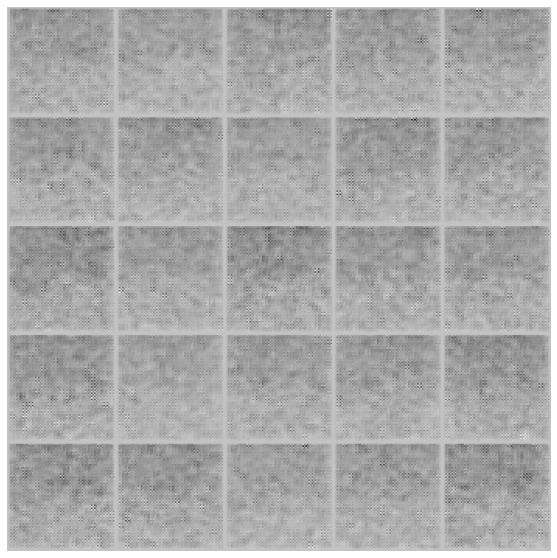

12000 0.6931471824645996 0.6931471824645996


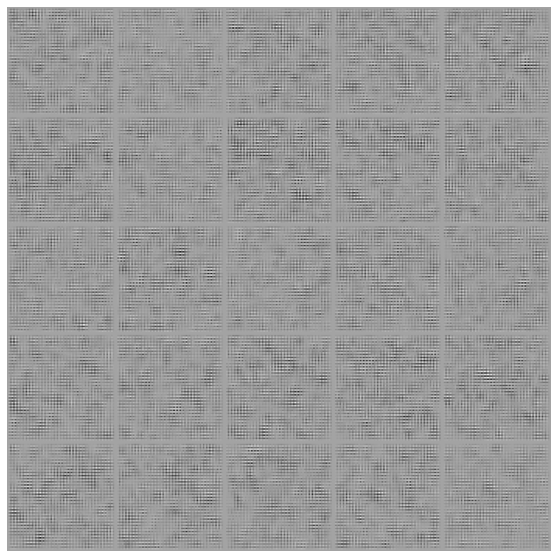

14000 0.0 100.0


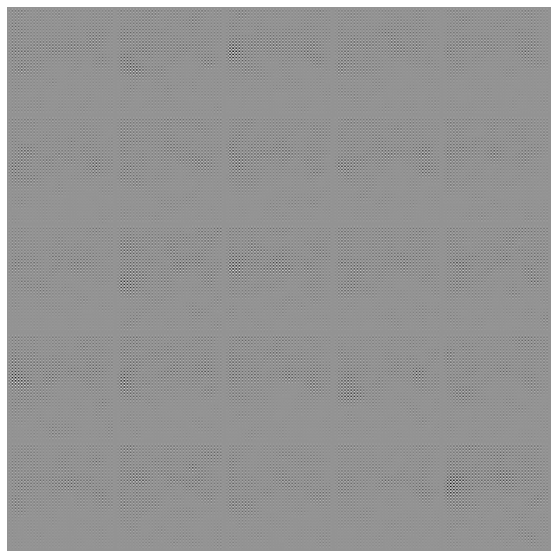

16000 0.0 100.0


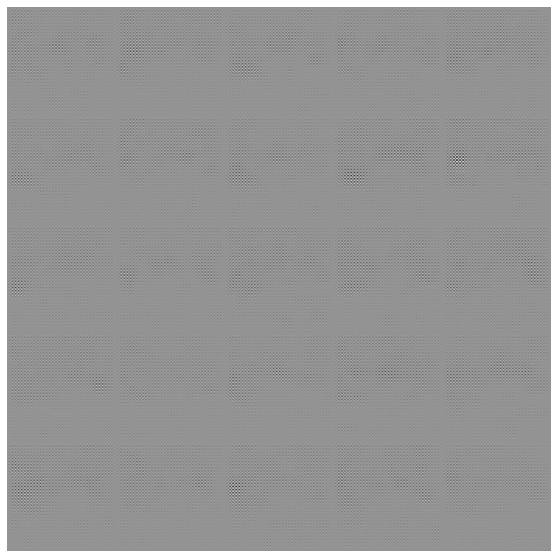

18000 0.0 100.0


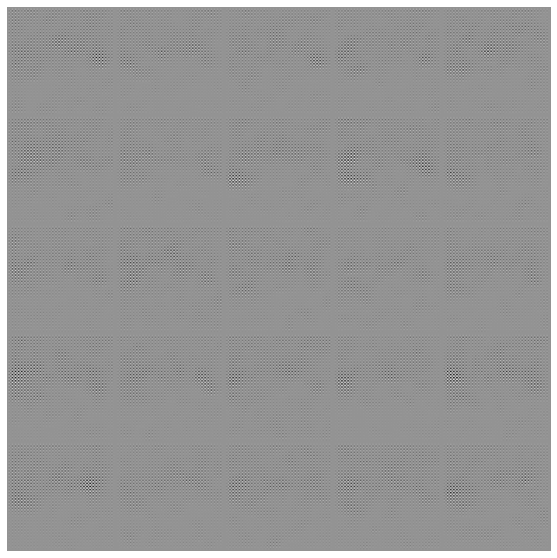

20000 0.0 100.0


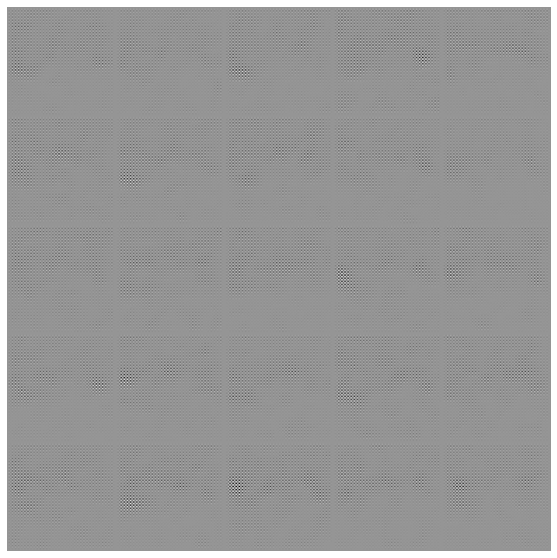

22000 0.0 100.0


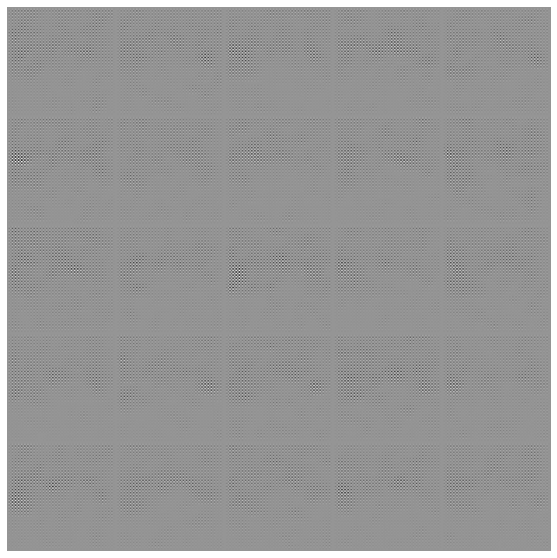

24000 0.0 100.0


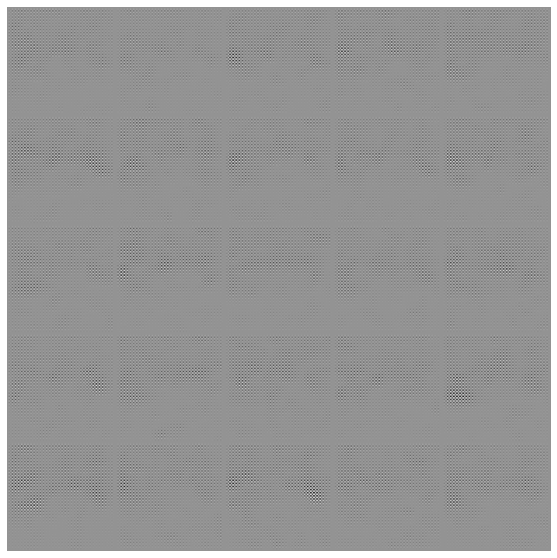

26000 0.0 100.0


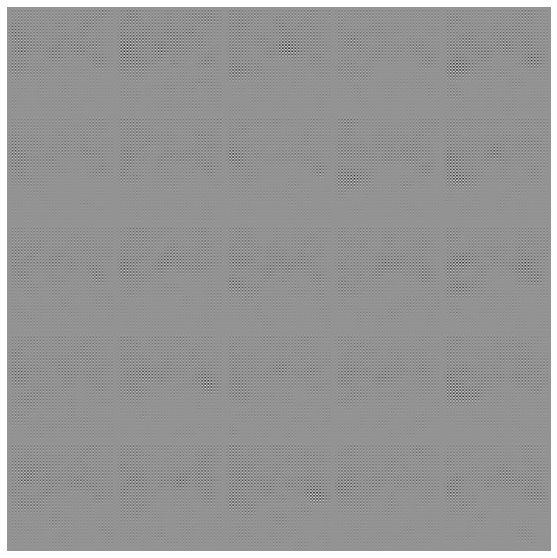

28000 0.0 100.0


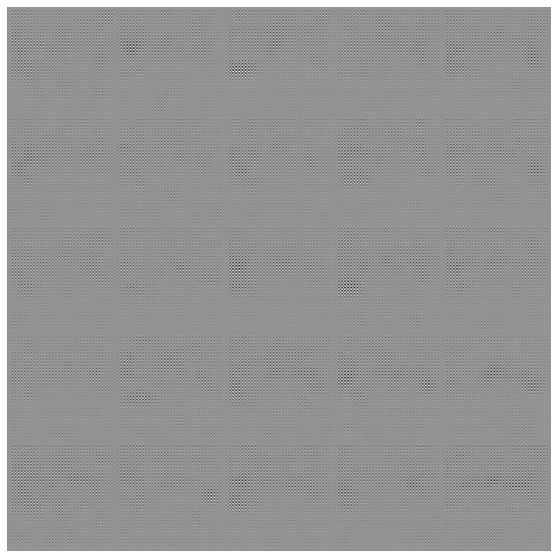

KeyboardInterrupt: ignored

In [ ]:
for i in trange(steps):
        
    images = get_batch()
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    backprop('d')
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    backprop('g')
    

    
    if i % 2000 == 0:
        out = G(z1[np.random.randint(steps)],w)
        print(i,d_loss.item(),g_loss.item())
        montage_plot(out.view(batch_size,1,68,68).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
np.save(w)

#Convolutional Transpose Example

In [ ]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import pylab
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
import torchvision.utils

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [ ]:
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(10, 10)
    plt.show()

In [ ]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
batch_size = 32

In [ ]:
#MNIST
# train_set = datasets.MNIST('./data', train=True, download=True)
# test_set = datasets.MNIST('./data', train=False, download=True)

#KMNIST
#train_set = datasets.KMNIST('./data', train=True, download=True)
#test_set = datasets.KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = datasets.FashionMNIST('./data', train=True, download=True)
test_set = datasets.FashionMNIST('./data', train=False, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

((6000, 1, 28, 28), (60000,), (1000, 1, 28, 28), (10000,))

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
def get_batch(mode):
    b = batch_size
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:,:,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:,:,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
x,y = get_batch('train')

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
def backprop(model):
    if model == 'd':
        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()
    elif model ==  'g':
        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = Variable(torch.ones(batch_size, 1).cuda())
fake_labels = Variable(torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500 
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = Variable(torch.randn(steps,batch_size,latent_size).cuda())
z2 = Variable(torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in trange(steps):
        
    images,y = get_batch('train')
        
    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    backprop('d')
    
    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    backprop('g')

    
    if i % 2000 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])